In [2]:
from PIL import Image
import json
from datetime import datetime
import numpy as np
import matplotlib.image as mpimg
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import imageio.core.util
from skimage.transform import rescale, resize, downscale_local_mean


In [3]:
def ignore_warnings(*args, **kwargs):
    pass

imageio.core.util._precision_warn = ignore_warnings

In [4]:
data_path = "D:\\METIS\\data\\"
image_path = "D:\\METIS\\images\\"

In [5]:
list_of_images = os.listdir(image_path)

In [6]:
len(list_of_images)

243502

In [7]:
list_of_images[0]

'46131.jpg.jpg'

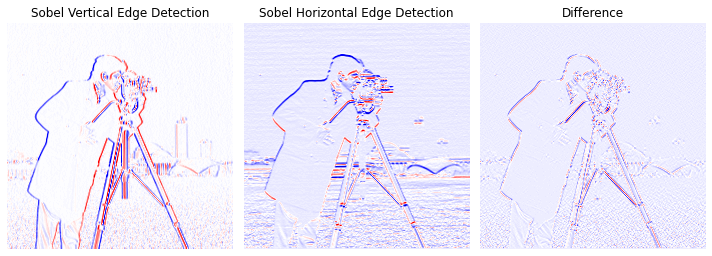

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

from skimage import filters
from skimage.data import camera
from skimage.util import compare_images
from skimage.io import imsave

image = camera()
edge_v = filters.sobel_v(image)
edge_h = filters.sobel_h(image)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True,
                         figsize=(10,10))

axes[0].imshow(edge_v, cmap=plt.cm.seismic)
axes[0].set_title('Sobel Vertical Edge Detection')

axes[1].imshow(edge_h, cmap=plt.cm.seismic)
axes[1].set_title('Sobel Horizontal Edge Detection')

axes[2].imshow(np.diff(edge_h), cmap=plt.cm.seismic)
axes[2].set_title('Difference')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
sobel_path = "D:\\METIS\\sobel\\"


In [10]:
import imageio.core.util

def ignore_warnings(*args, **kwargs):
    pass

imageio.core.util._precision_warn = ignore_warnings

In [11]:
from skimage.transform import rescale, resize, downscale_local_mean


In [12]:
start = datetime.now()

12.401504248903509
11.690370674951266
118.08337140594543


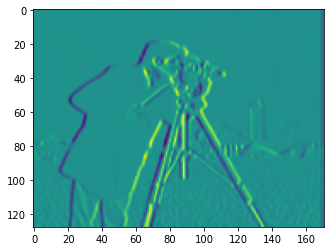

In [13]:
image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))
edge_v = filters.sobel_v(image_downscaled)
edge_h = filters.sobel_h(image_downscaled)
plt.imshow(edge_v)
#imsave(sobel_path + "test.jpg" , image_downscaled)
print(np.mean(abs(edge_v)))
print(np.mean(abs(edge_h)))
print(np.mean(abs(image_downscaled)))


In [14]:
sobel_vals = []

In [15]:
for i, img in enumerate(list_of_images):
    if i % 1000 == 0:

        print("{}: {} elapsed".format(i, datetime.now() - start))

    try:
        if i % 1000 == 0:
            with open(data_path + "sobel_vals.json", "w") as write_file:
                sobel_vals = [x.astype('uint8') for x in sobel_vals]
                json.dump(sobel_vals.astype, write_file)  


        image = mpimg.imread(image_path + img)
        image = rgb2gray(image)

        image_rescaled = rescale(image, 0.25, anti_aliasing=False)
        image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                                                            anti_aliasing=True)

        image_downscaled = downscale_local_mean(image, (4, 3))
        image = image_downscaled  

  
        edge_v = filters.sobel_v(image)
        edge_h = filters.sobel_h(image)
        edge_d = filters.sobel_h(filters.sobel_v(image))
        

        sobel_vals.append({
                            'image': img,
                            'mean of image': np.mean(abs(image)).astype('uint8'),
                            'mean of abs(sobel_v)': np.mean(abs(edge_v)).astype('uint8'),
                            'mean of abs(sobel_h)': np.mean(abs(edge_h)).astype('uint8'),
                            'mean of abs(sobel_diag)': np.mean(abs(edge_d)).astype('uint8')
                            })
    except:
        pass

0: 0:00:01.253352 elapsed
1000: 0:20:23.045464 elapsed
